In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
df = pd.read_csv(r'D:\ML\Space survival\train.csv')

In [3]:
df.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [4]:
df.isna().sum()

PassengerId       0
HomePlanet      201
CryoSleep       217
Cabin           199
Destination     182
Age             179
VIP             203
RoomService     181
FoodCourt       183
ShoppingMall    208
Spa             183
VRDeck          188
Name            200
Transported       0
dtype: int64

In [5]:
df1 = df[['HomePlanet','CryoSleep','Cabin','Destination','Age','VIP']]

In [6]:
df1.head()

,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP
0,Europa,False,B/0/P,TRAPPIST-1e,39.0,False
1,Earth,False,F/0/S,TRAPPIST-1e,24.0,False
2,Europa,False,A/0/S,TRAPPIST-1e,58.0,True
3,Europa,False,A/0/S,TRAPPIST-1e,33.0,False
4,Earth,False,F/1/S,TRAPPIST-1e,16.0,False


In [7]:
len(df1.Cabin.unique())

6561

In [8]:
df1 = df1.drop('Cabin',axis = 1)

In [9]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8693 entries, 0 to 8692
Data columns (total 5 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   HomePlanet   8492 non-null   object 
 1   CryoSleep    8476 non-null   object 
 2   Destination  8511 non-null   object 
 3   Age          8514 non-null   float64
 4   VIP          8490 non-null   object 
dtypes: float64(1), object(4)
memory usage: 339.7+ KB


In [10]:
df1 = df1.assign(Transported = df['Transported'])

**Handling Null Values**

In [11]:
df1.HomePlanet = df1.HomePlanet.ffill()
df1.CryoSleep = df1.CryoSleep.fillna(False)
df1.Destination = df1.Destination.fillna(0)
df1.Age = df1.Age.fillna(df1.Age.mean())
df1.VIP = df1.VIP.fillna(False)

C:\Users\Arjit Mishra\AppData\Local\Temp\ipykernel_62028\262264922.py:2: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.CryoSleep = df1.CryoSleep.fillna(False)
C:\Users\Arjit Mishra\AppData\Local\Temp\ipykernel_62028\262264922.py:5: FutureWarning: Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  df1.VIP = df1.VIP.fillna(False)


In [12]:
df1.isna().sum()

HomePlanet     0
CryoSleep      0
Destination    0
Age            0
VIP            0
Transported    0
dtype: int64

**Relationships within**

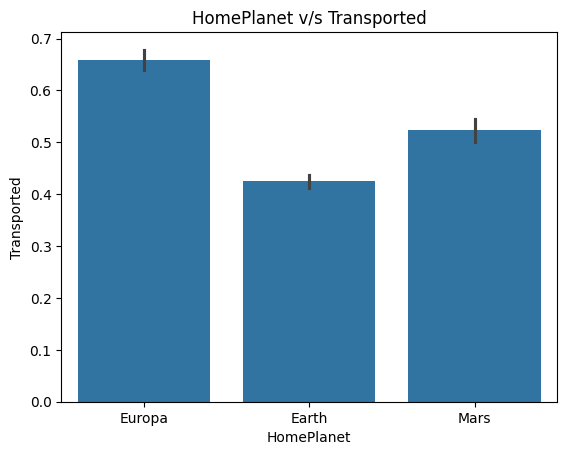

<Figure size 600x600 with 0 Axes>

In [53]:
plt.title('HomePlanet v/s Transported')
sns.barplot(x = 'HomePlanet',y = 'Transported',data = df1,legend = 'auto')
plt.figure(figsize = (6,6))
plt.show()

**Data Preprocessing**

In [13]:
df1.columns

Index(['HomePlanet', 'CryoSleep', 'Destination', 'Age', 'VIP', 'Transported'], dtype='object')

In [14]:
df1.HomePlanet.unique() , df1.Destination.unique()

(array(['Europa', 'Earth', 'Mars'], dtype=object),
 array(['TRAPPIST-1e', 'PSO J318.5-22', '55 Cancri e', 0], dtype=object))

In [15]:
df1['HomePlanet'] = df1['HomePlanet'].map({
    'Europa' : 1,
    'Earth' : 2,
    'Mars' : 3
})

df1['Destination'] = df1['Destination'].map({
    'TRAPPIST-1e' : 1,
    'PSO J318.5-22' : 2,
    '55 Cancri e' : 3,
    0 : 0
})

In [16]:
df1.HomePlanet.unique() , df1.Destination.unique()

(array([1, 2, 3], dtype=int64), array([1, 2, 3, 0], dtype=int64))

In [17]:
df1.CryoSleep.unique() , df1.Transported.unique() , df1.VIP.unique()

(array([False,  True]), array([False,  True]), array([False,  True]))

In [18]:
df1['CryoSleep'] = df1['CryoSleep'].map({
    True : 1,
    False : 0
})

df1['Transported'] = df1['Transported'].map({
    True : 1,
    False : 0
})

df1['VIP'] = df1['VIP'].map({
    True : 1,
    False : 0
})

In [19]:
df1.CryoSleep.unique() , df1.Transported.unique() , df1.VIP.unique()

(array([0, 1], dtype=int64),
 array([0, 1], dtype=int64),
 array([0, 1], dtype=int64))

In [20]:
df1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported
0,1,0,1,39.0,0,0
1,2,0,1,24.0,0,1
2,1,0,1,58.0,1,0
3,1,0,1,33.0,0,0
4,2,0,1,16.0,0,1


In [21]:
Age = df1['Age']

In [22]:
Age = pd.DataFrame(Age,columns = ['Age'])

In [23]:
Age.head()

,Age
0,39.0
1,24.0
2,58.0
3,33.0
4,16.0


In [24]:
from sklearn.preprocessing import StandardScaler

In [25]:
scaler = StandardScaler()

scaler.fit(Age)

StandardScaler()

In [26]:
scaled_age = scaler.transform(Age)

In [27]:
df1['Age'] = scaled_age

In [28]:
df1.head()

,HomePlanet,CryoSleep,Destination,Age,VIP,Transported
0,1,0,1,0.709437,0,0
1,2,0,1,-0.336717,0,1
2,1,0,1,2.034566,1,0
3,1,0,1,0.290975,0,0
4,2,0,1,-0.894666,0,1


In [29]:
y = df1['Transported']

In [30]:
df1 = df1.drop('Transported',axis = 1)

In [31]:
x = df1.copy()

In [32]:
x.head()

,HomePlanet,CryoSleep,Destination,Age,VIP
0,1,0,1,0.709437,0
1,2,0,1,-0.336717,0
2,1,0,1,2.034566,1
3,1,0,1,0.290975,0
4,2,0,1,-0.894666,0


In [33]:
y

0       0
1       1
2       0
3       0
4       1
       ..
8688    0
8689    0
8690    1
8691    0
8692    1
Name: Transported, Length: 8693, dtype: int64

**Model Selection & Training**

In [40]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn import metrics
from sklearn.model_selection import GridSearchCV 

In [35]:
x_train,x_test,y_train,y_test = train_test_split(x,y,random_state = 42,shuffle = True,test_size = 0.2)

In [36]:
lr = LinearRegression()
rfc = RandomForestClassifier()
xgb = XGBClassifier()

In [52]:
param_grid_lr = {'fit_intercept': [True, False] , 'n_jobs' : [-1,1],'positive' : [True, False]}

param_grid_rfc = {
    'n_estimators': [100, 200, 300],
    'max_depth': [4, 8, 12],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt'] 
}

param_grid_xgb = {
    'max_depth': range(2, 10, 1),  # Range of depths for trees
    'n_estimators': range(60, 200, 40),  # Number of decision trees
    'learning_rate': [0.1, 0.01, 0.05]  # Learning rate for each tree
}

In [53]:
gcv_lr = GridSearchCV(lr,param_grid_lr,cv = 5)

In [42]:
gcv_rfc = GridSearchCV(rfc,param_grid_rfc,cv=5,scoring = 'accuracy')

In [43]:
gcv_xgb = GridSearchCV(xgb,param_grid_xgb,cv=5)

In [54]:
gcv_lr.fit(x_train,y_train)

GridSearchCV(cv=5, estimator=LinearRegression(),
             param_grid={'fit_intercept': [True, False], 'n_jobs': [-1, 1],
                         'positive': [True, False]})

In [ ]:
gcv_rfc.fit(x_train,y_train)

In [56]:
gcv_xgb.fit(x_train,y_train)

KeyboardInterrupt: 